In [2]:
import tensorflow as tf
tf.__version__

2022-09-08 21:36:44.766306: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-08 21:36:45.374627: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-08 21:36:45.374660: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-08 21:36:45.464025: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-08 21:36:46.899455: W tensorflow/stream_executor/platform/de

'2.10.0'

In [3]:
mnist = tf.keras.datasets.mnist # 28x28 images of hand written digits 0-9

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [7]:
import matplotlib.pyplot as plt

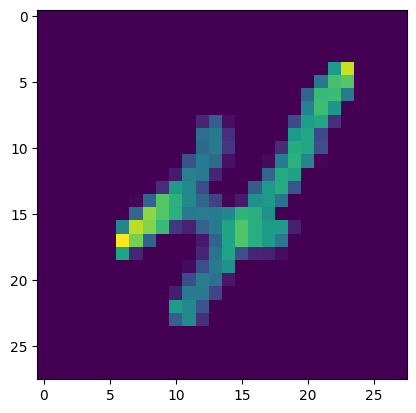

In [43]:
plt.imshow(x_train[9])

In [25]:
#normalize to 0 -1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [44]:
#make sequencial model
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Flatten())

#128 neurons, and act func

#inner layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2675 - accuracy: 0.9213
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1079 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0733 - accuracy: 0.9769


In [46]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9735


In [47]:
print(val_loss, val_acc)

0.08680114895105362 0.9735000133514404


In [48]:
model.save('28x28dig_reader.model')

INFO:tensorflow:Assets written to: 28x28dig_reader.model/assets


In [12]:
#load model
nmodel = tf.keras.models.load_model('28x28dig_reader.model')
nmodel.summary()

2022-09-09 01:09:01.955723: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-09 01:09:01.956260: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-09 01:09:01.956344: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (timemachine): /proc/driver/nvidia/version does not exist
2022-09-09 01:09:01.957995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [50]:
predictions = model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [51]:
predictions

array([[8.0416213e-10, 7.9281335e-07, 3.4070039e-05, ..., 9.9832392e-01,
        2.1380998e-07, 2.0951054e-06],
       [1.5883189e-09, 7.4964529e-03, 9.9249047e-01, ..., 1.7603883e-08,
        2.3013202e-07, 3.9570014e-11],
       [7.8829014e-09, 9.9994606e-01, 3.7209725e-06, ..., 3.2424938e-05,
        5.6862268e-06, 3.7366422e-07],
       ...,
       [1.0291218e-09, 2.3307112e-07, 1.7880778e-08, ..., 3.2000360e-06,
        4.7745875e-06, 3.0889867e-05],
       [3.8653802e-06, 4.8757883e-04, 3.5120422e-06, ..., 2.6038188e-05,
        1.2887588e-03, 1.6583392e-07],
       [2.9543156e-07, 5.4027034e-08, 2.2750496e-06, ..., 1.2244638e-09,
        1.0717282e-06, 5.2166591e-09]], dtype=float32)

In [52]:
import numpy as np

In [53]:
np.argmax(predictions[0])

7

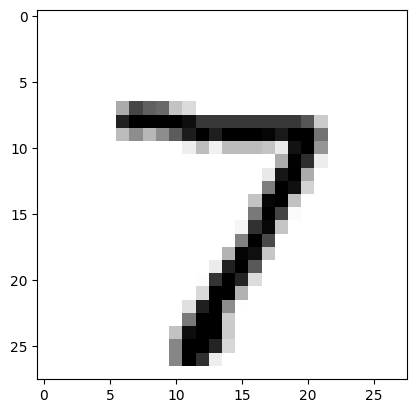

In [11]:
plt.imshow(x_test[0],cmap="binary")